In [18]:
from dl import queryClient as qc
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.colors import LogNorm
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import statistics as st
from numpy import nan
from dlnpyutils import utils as dln

In [19]:
lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3_extra.fits')

lmc_gaia_catalog_source_10deg_dec53 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits')

lmc_apogee_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_rgbmembers.dr17rev1_qacuts.fits')

lmc_gaia_catalog_source_10deg_dec53_pm15 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_pm15.fits')

lmc_sdssv_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/boss_lmc_sample.fits')


lmc_maps_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/maps_spectra_results_gaiaedr3.fits')


In [20]:
lmc_maps_catalog

ID,FILE,RA,DEC,GLON,GLAT,MLON,MLAT,LMCPA,LMCRAD,SMCPA,SMCRAD,INSTRUMENT,M,MERR,T2,T2ERR,DDO51,DDO51ERR,PRIORITY,SNR,VHELIO,VERR,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FEH,FEH_ERR,ALPHAFE,ALPHAFE_ERR,DOP_TEFF,DOP_TEFFERR,DOP_LOGG,DOP_LOGGERR,DOP_FEH,DOP_FEHERR,DOP_VHELIO,DOP_VREL,DOP_VRELERR,DOP_BC,DOP_CHISQ,GMAG,GERR,BP,BPERR,RP,RPERR,PARALLAX,PARALLAX_ERROR,PMRA,PMRA_ERROR,PMDEC,PMDEC_ERROR,PML,PMB,PMML,PMMB
bytes19,bytes63,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,bytes6,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
NEa1_2.10479,NEa1_2.10479.fits,87.62960667,-62.256113333,271.39467255868476,-30.82367049778928,2.6154970702643006,9.91542877188697,19.636232,7.949376,107.573235,28.06198,HYDRA,18.86764,0.044,18.85384,0.135,18.79676,0.084,-1,8.2,-557.5372,24.224688,3604.694,709.953,3.197,2.952,-4.922,3.414,-0.19,30.019,7986.741,49.443924,4.9270215,0.092950806,0.46969658,0.017764525,401.11136,403.47296,3.1487274,-2.3616092,2.1366508,18.783884,0.0022478935,18.790154,0.016131883,18.840334,0.039521888,0.2123137,0.14474362,1.5989869,0.21400884,0.2110268,0.19084004,-0.20105018,1.6002719,1.6083226,0.12078895
NEa1_2.1102,NEa1_2.1102.fits,87.209736255,-62.197510278,271.32560823220683,-31.01912374288466,2.4202726926405447,9.984259279922586,18.162144,7.9594665,107.16618,27.990347,HYDRA,16.7365,0.021,15.7155,0.025,16.740501,0.077,-1,7.919,92.45354,16.851955,7106.522,239.504,5.0,0.422,1.0,0.481,0.999,3.508,6580.187,31.709942,4.8123026,0.049692363,0.4985653,0.008774901,81.11449,83.52335,1.1371287,-2.408862,1.608553,16.328217,0.000511807,16.724989,0.005531857,15.761082,0.00332962,0.6722527,0.035580155,-4.8581853,0.046001006,13.946747,0.042776976,-13.948559,-4.8529825,-4.166655,14.168723
NEa1_2.11414,NEa1_2.11414.fits,87.67963959,-62.128181944,271.2459190669398,-30.79939829234138,2.6465176665374273,10.04183227997377,19.571278,8.079103,107.4489,28.178072,HYDRA,17.45821,0.023,15.76501,0.025,17.49839,0.078,-1,21.879,311.4647,3.649384,4257.56,58.991,1.633,0.193,-0.564,0.085,0.088,0.059,5205.958,7.519291,3.4485865,0.014441885,-0.89523095,0.0030582054,311.8668,314.29245,0.5215915,-2.4256587,1.0544143,16.668144,0.00060244906,17.400026,0.0060855174,15.854252,0.003052525,0.092038475,0.039937764,1.4823686,0.053176723,0.6282416,0.052031685,-0.61585695,1.4875566,1.5158179,0.54258686
NEa1_2.12134,NEa1_2.12134.fits,87.711117495,-62.21084,271.34227806810475,-30.78537667449786,2.656602267093959,9.95846750659964,19.819876,8.002689,107.57941,28.120998,HYDRA,17.599209,0.023,15.98801,0.025,17.60639,0.078,-1,23.54,327.13184,3.858266,4451.168,80.506,1.779,0.213,-0.895,0.089,0.122,0.086,4897.081,7.6313744,2.3348343,0.010030161,-1.3141704,0.004166039,327.3549,329.7365,0.47385988,-2.3816452,0.9457906,16.831259,0.0006869631,17.544273,0.010251766,16.03316,0.003830916,-0.038105264,0.04628448,1.67081,0.069057725,0.61537576,0.061189894,-0.6020488,1.6756583,1.7034853,0.5181041
NEa1_2.12568,NEa1_2.12568.fits,87.73164417,-62.262825278,271.40287267707004,-30.776223331170957,2.663244237612105,9.906016653045544,19.980747,7.9547806,107.66225,28.085346,HYDRA,17.35878,0.022,15.44518,0.024,17.38002,0.078,-1,27.947,313.30737,3.10076,4138.388,42.396,1.725,0.137,-1.078,0.061,0.072,0.057,4986.331,8.780238,2.879062,0.015304335,-1.0525367,0.0046661873,313.27185,315.6258,0.48708904,-2.3539193,1.2418128,16.416548,0.0006435477,17.224455,0.004994291,15.549991,0.002689653,0.036897443,0.03495621,1.3966727,0.050156478,0.5585313,0.04924944,-0.5477041,1.400954,1.4266891,0.47666568
NEa1_2.12813,NEa1_2.12813.fits,87.743740005,-62.197411111,271.3267949854078,-30.770053345386025,2.6728111705030813,9.970993380380452,19.901382,8.019505,107.587944,28.140888,HYDRA,18.96221,0.

In [21]:
lmc_sdssv_catalog

programname,survey,fieldquality,fieldsn2,exp_disp_med,lambda_eff,calibflux,calibflux_ivar,gaia_bp,gaia_rp,gaia_g,cadence,firstcarton,racat,deccat,coord_epoch,pmra,pmdec,parallax,catalogid,catalogid_v0,catalogid_v0p5,gaia_id_dr2,fiber2mag,psfmag,catdb_mag,optical_prov,obs,field,nexp,exptime,airmass,seeing20,seeing50,seeing80,healpix,healpixgrp,mjd_final,ebv,ebv_type,wise_mag,twomass_mag,guvcat_mag,fiber_offset,spec_file,xcsao_rv,xcsao_erv,xcsao_rxc,xcsao_teff,xcsao_eteff,xcsao_logg,xcsao_elogg,xcsao_feh,xcsao_efeh,mjd,target_index,run2d,run1d,objtype,fiber_ra,fiber_dec,plug_ra,plug_dec,class,subclass,z,z_err,rchi2,dof,rchi2diff,tfile,vdisp,vdisp_err,vdispz,vdispz_err,vdispchi2,vdispnpix,vdispdof,wavemin,wavemax,wcoverage,zwarning,sn_median,sn_median_all,chi68p,spectroflux,spectroflux_ivar,spectrosynflux,spectrosynflux_ivar,spectroskyflux,anyandmask,anyormask,spec1_g,spec1_r,spec1_i,spec2_g,spec2_r,spec2_i,z_noqso,z_err_noqso,znum_noqso,zwarning_noqso,class_noqso,subclass_noqso,rchi2diff_noqso,specobjid,assigned,on_target,valid,moon_dist,moon_phase,carton_to_target_pk,mlon,mlat,gaiadr3_ra,gaiadr3_dec,gaiadr3_sourceid,gaiadr3_parallax,gaiadr3_parallax_error,gaiadr3_pmra,gaiadr3_pmra_error,gaiadr3_pmdec,gaiadr3_pmdec_error,gaiadr3_ruwe,gaiadr3_gmag,gaiadr3_gmag_error,gaiadr3_bpmag,gaiadr3_bpmag_error,gaiadr3_rpmag,gaiadr3_rpmag_error,gaiadr3_bprp,gaiadr3_pmml,gaiadr3_pmmb,specfile,lmc_radius
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,mag,,mag,,mag,,mag,mas / yr,mas / yr,,
bytes13,bytes13,bytes4,float32,float64,float32,float32[5],float32[5],float32,float32,float32,bytes13,bytes40,float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float32[5],float32[5],float32[5],bytes26,bytes3,int32,int16,int16,float32,float32,float32,float32,int32,int16,float64,float32,bytes11,float32[4],float32[3],float32[2],float32,bytes41,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,bytes6,bytes6,bytes16,float64,float64,float64,float64,bytes6,bytes21,float32,float32,float32,int32,float32,bytes24,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32[5],float32,float32,float32[5],float32[5],float32[5],float32[5],float32[5],int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,bytes6,bytes21,float32,int64,int16,int16,int16,float32,float32,int64,float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,bytes87,float64
open_fiber,open_fiber,bad,5.746918,4.776909446541126,5400.0,0.0 .. 0.0,0.0 .. 0.0,17.600637,16.04884,16.873476,bright_1x1,openfibertargets_nov2020_47a,113.50048913030388,-58.32623066978801,2015.5,0.924869,1.19978,0.0870233,27021599420814788,0,27021599420814788,5293914777099269120,-- .. --,-- .. --,-- .. --,sdss_psfmag_gaia,LCO,25293,4,3600,-9.22594,1.0129724,1.189106,1.3319572,181752,181,60007.052804015155,0.18147694,SFD,14.041 .. 9.74,14.863 .. 13.991,-- .. --,0.0,spec-025293-60007-27021599420814788.fits,364.98938,6.970288,12.648653,5534.64,133.45035,3.370042,0.6166977,-0.9981169,0.44695663,60007,177,master,master,science,113.5005,-58.326207,0.0,0.0,STAR,G5Iab: (20123),0.0012524656,1.2625926e-05,1.4502071,4162,0.6057838,spEigenStar-55734.fits,0.0,0.0,0.0,0.0,0.0,0.0,0,3930.0671,10332.371,0.4167,0,0.0 .. 31.832554,27.548685,1.0133288,15.285272 .. 307.3544,0.2992375 .. 0.20344445,6.2491045 .. 306.73688,0.6116066 .. 0.23325524,25.400196 .. 114.084465,88211456,256835584,0.0,0.0,0.0,5.746918,15.049344,11.226305,0.0012524656,1.2625926e-05,1,0,STAR,G5Iab: (20123),0.6057838,-8416052982369484800,1,1,1,83.25,0.89,583514789,16.127919023186944,10.164875273916723,113.50048939599,-58.32623049666,5293914777099268992,0.0801,0.0435,1.126,0.057,1.239,0.053,0.984,16.853912,0.002832,17.574184,0.008107,16.035316,

In [12]:
# Dont need anymore
lmc_sdssv_catalog['lmc_radius'] = ((lmc_sdssv_catalog['mlon'])**2 + (lmc_sdssv_catalog['mlat'])**2)**(0.5)

In [7]:
lmc_sdssv_catalog.write('/Users/slaterjonesoden/Desktop/LMC_Periphery/boss_lmc_sample.fits', overwrite = True)


In [22]:
lmc_gaia_catalog_source_10deg_dec53_pm15

ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag,mlon,mlat,pmml,pmmb,lmc_radius
,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.66170141084659,0.150748,-44.66740929469223,0.150482,2.53651451573085,0.195639,-0.4233671131469815,0.193003,0.0416973009099641,0.159858,2.571604,--,--,-33.32742530075801,250.4098183632071,-67.65166959762398,74.26178940534572,--,--,19.62399,18.883915,19.292645,-1.070894242054237,27.501592838477777,2.5543096846461224,-0.29773752858975205,27.52243490556526
81.70904571133516,0.358216,-44.626987507909305,0.358372,1.2799744344296506,0.475699,-0.1074476899657884,0.491463,0.4792669336636608,0.39586,1.284476,--,--,-33.28921287149829,250.36653862679398,-67.61680411079617,74.36534927847174,--,--,20.435816,19.857458,20.376425,-1.0351867589309904,27.543613093223637,1.2836774309819208,-0.04529693212724763,27.563059225257756
81.77760168610264,0.307257,-44.6374892557893,0.338429,2.401491244568082,0.397975,-0.4107479101807482,0.442023,0.0332346379828578,0.344311,2.436365,--,--,-33.242017503941916,250.38593451595904,-67.6345081679636,74.48792212185282,--,--,20.721077,19.755249,20.235525,-0.9796625443797211,27.535456039175507,2.41819319048204,-0.29701134146912245,27.552877853070584
81.98756596635134,0.137323,-44.614497012887014,0.163866,0.5616557221699894,0.182824,-0.0071719597674133,0.208207,0.1148358001904521,0.158079,0.561702,--,--,-33.09090362654202,250.38014477113305,-67.63382502625008,74.88524866229632,--,--,19.6442,18.430807,19.119183,-0.8124620158166067,27.56518070888479,0.5614403504051649,0.017126593068165805,27.57715144899159
81.87707903470252,0.608826,-44.69351501051816,0.591684,2.1004855699594316,0.768366,0.0757709512100989,0.766263,-0.0212867313715062,0.650746,2.101852,--,--,-33.17845284588164,250.4625037880013,-67.70043874434425,74.65010229056482,--,--,20.964222,19.669306,20.680897,-0.8970581888159472,27.482760862985497,2.09489923618503,0.17081585665988586,27.49739729585637
81.90771177193729,0.017531,-44.688331121639536,0.018324,2.30742895074019,0.023834,0.8244672735040757,0.023646,0.5721163786627013,0.019253,2.450301,--,--,-33.15621178002782,250.45946936855526,-67.69853131772783,74.7088804616337,5553.16,4.2187,15.53935,14.708019,15.210203,-0.8727980120326038,27.488919485068013,2.268254803795118,0.9268197197155355,27.50277205712835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77.87908428061924,0.819049,-47.0359185772402,0.88296,2.127305832976881,0.999911,0.290903382072785,1.215435,-0.8442793288254108,0.950966,2.147104,--,--,-36.145405419342865,253.02179677240855,-69.46419944505581,65.92376595466048,--,--,21.08421,19.777788,20.760881,-3.777054336785625,24.92221369974508,2.0784784743388722,0.538499875978435,25.206802160504065


In [13]:
print(np.max(lmc_gaia_catalog_source_10deg_dec53_pm15["pmml"]) - np.min(lmc_gaia_catalog_source_10deg_dec53_pm15["pmml"]))

2.9979528478823725


In [3]:
lmc_apogee_catalog

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,FPARAM_GRID,CHI2_GRID,FPARAM,FPARAM_COV,ASPCAP_CHI2,PARAM,PARAM_COV,PARAMFLAG,ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM,FELEM_ERR,X_H,X_H_ERR,X_M,X_M_ERR,ELEM_CHI2,ELEMFRAC,ELEMFLAG,EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC,X_M_SPEC,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK,LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,SELECTFUNC,SELECTFUNCHMAX,GAIAEDR3_MATCH,GAIAEDR3_GMAG,GAIAEDR3_BPMAG,GAIAEDR3_RPMAG,GAIAEDR3_PML,GAIAEDR3_PMB,GAIAEDR3_PMML,GAIAEDR3_PMMB
bytes35,bytes18,bytes39,bytes44,bytes58,bytes6,int32,bytes5,bytes17,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes8,float32,bytes9,float32,float32,int32,int32,int32,int32,int32,int32,bytes121,bytes8,bytes23,int32,float32,float32,int64,bytes79,int64,bytes63,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,"float32[21,9]",float32[21],float32[9],"float32[9,9]",float32,float32[9],"float32[9,9]",int64[9],int64,bytes154,float32,float32,float32,float32[27],float64[27],float32[27],float32[27],float32[27],float32[27],float32[27],float32[27],int64[27],int32,int64,bytes6,float32[27],float32[27],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,floa

In [3]:
lmc_catalog

ID,RA,DEC,M,T,D,VHEL,VERR,VHEL_MIKE,VGSR,DIST,L,B,GAIAEDR3_RA,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC,GAIAEDR3_DEC_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_GMAG,GAIAEDR3_GERR,GAIAEDR3_BPMAG,GAIAEDR3_BPERR,GAIAEDR3_RPMAG,GAIAEDR3_RPERR,GAIAEDR3_PML,GAIAEDR3_PMB,GAIAEDR3_PMML,GAIAEDR3_PMMB,VHELIO,LMCRAD,LMCPA,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,GAIAEDR3_Total_MAG_PM,GAIAEDR3_Total_PM,pmra_model,pmdec_model
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,,,mas / yr,mas / yr
int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,105.12679291500001,-48.432281494,16.5329,15.0277,16.518,9999.9,9999.9,204.4,-9.092921,234.59,258.5664112343072,-18.529466742055202,105.1267525677789,0.024629863,-48.4322243022933,0.02877545,0.923296288674212,0.033957716,-0.315218639078465,0.036785074,0.0755301643488606,0.028460298,15.833436,0.00040028456586519486,16.437096,0.004289827728933562,15.082449,0.0025447046126595933,0.6159130768287333,0.7566304574879723,0.7457170864317325,-0.6290823222343533,204.4,24.171135,39.720993,0.5910812109647093,-1.4563538422118818,0.39941654671238064,-1.808269787224674,0.03936910007629734,-0.054541031128959465,0.15229556417603132,0.4064569761417518,0.1172970094840879,0.9930968792449656,1.1813776506744686,20.836427869100472,87.294243,0.9756221437662715,0.9756222768582385,1.4563538422118818,0.5910812109647093
2,105.681137085,-48.917621613,19.6126,18.387,19.5703,106.04,14.17,9999.9,-107.98845,234.42,259.18046050364035,-18.355619420554138,105.68110610733136,0.16334176,-48.91755275925184,0.17898266,0.7567200091018459,0.19598085,4.80280253793183,0.23308396,-0.0349947863758711,0.17819394,19.13581,0.0034218993856300157,19.692463,0.040909862122232306,18.494345,0.03058577207100339,-4.232884148710571,2.3921165592355464,2.4846740294763476,4.179225324207891,106.04,23.837791,40.970665,0.6276470365295748,-1.439709634590702,0.4284723250843425,-1.7931797256788025,0.04206385130496689,-0.05177868380184163,0.15711086014026518,0.40524877488994193,0.10516368853892688,0.994454925380174,1.1829729894502468,20.5949819644879,87.294243,4.862049963685496,4.862050739198382,1.439709634590702,0.6276470365295748
3,105.76667785500001,-48.877811432,17.1322,15.8762,17.0406,94.83,3.8,9999.9,-119.26215,238.43,259.1619909389045,-18.288987564927666,105.76666449242522,0.035635326,-48.87777336380816,0.037874736,-0.4789935716991621,0.044019222,5.194062454278871,0.048492216,0.1903779067860237,0.038512304,16.581732,0.0005911569769307861,17.051605,0.009353064800417194,15.943343,0.003650808662217479,-5.0307594104191455,1.3781041204197209,1.4901586964555726,4.998713635018248,94.83,23.8945,41.067375,0.6285256849296834,-1.4374876007338655,0.42928373123399066,-1.7912980114989476,0.04201190613237348,-0.051556172950732726,0.15723004756331918,0.40536658371581497,0.10425112809200052,0.9945510053745584,1.1833892294412898,20.63792941320673,87.294243,5.216101150499155,5.216101956507232,1.4374876007338655,0.6285256849296834
4,105.70675659,-48.874008179,17.295,16.0628,17.2499,5.35,3.97,9999.9,-208.693,236.63,259.1436563456175,-18.324548781031783,105.70673235880412,0.047769118,-48.87397260988282,0.053647943,-3.0730090192011743,0.06065428,1.1981336544588146,0.06750003,0.6602657573325414,0.053499155,16.77145,0.0007319435313258877,17.215609,0.012869241753653797,16.127047,0.0045244208642838315,-2.2005523434043095,-2.4569237524474374,-2.407893547476967,2.2540971329476633,5.35,23.884535,40.97276,0.6265976600554234,-1.439146442029

In [14]:
good_lmc_catalog = lmc_catalog[np.where(np.isfinite(lmc_catalog['M']) & 
                              np.isfinite(lmc_catalog['T']) & 
                              np.isfinite(lmc_catalog['D']) &
                              np.isfinite(lmc_catalog['VHEL']) &
                              np.isfinite(lmc_catalog['LMCRAD']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_PMRA']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_PMDEC']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_BPMAG']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_RPMAG']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_GMAG']) & 
                              np.isfinite(lmc_catalog['VHELIO']) & 
                              np.isfinite(lmc_catalog['GAIAEDR3_PML']))]

In [15]:
good_lmc_apogee_catalog = lmc_apogee_catalog[np.where(np.isfinite(lmc_apogee_catalog['RV_TEFF']) & 
                              np.isfinite(lmc_apogee_catalog['LMCRAD']))]
                                                      
                                                      
#                               np.isfinite(lmc_apogee_catalog['D']) &
#                               np.isfinite(lmc_apogee_catalog['VHEL']) &
#                               np.isfinite(lmc_apogee_catalog['LMCRAD']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_PMRA']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_PMDEC']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_BPMAG']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_RPMAG']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_GMAG']) & 
#                               np.isfinite(lmc_apogee_catalog['VHELIO']) & 
#                               np.isfinite(lmc_apogee_catalog['GAIAEDR3_PML']))]

In [25]:
good_lmc_gaia_catalog_source_10deg_dec53_pm15 = lmc_gaia_catalog_source_10deg_dec53_pm15[np.where(np.isfinite(lmc_gaia_catalog_source_10deg_dec53_pm15['radial_velocity']))]

print(len(good_lmc_gaia_catalog_source_10deg_dec53_pm15))
print(lmc_gaia_catalog_source_10deg_dec53_pm15)

3429
        ra        ra_error ...         pmmb             lmc_radius    
                           ...                             deg        
----------------- -------- ... -------------------- ------------------
81.66170141084659 0.150748 ... -0.29773752858975205  27.52243490556526
81.70904571133516 0.358216 ... -0.04529693212724763 27.563059225257756
81.77760168610264 0.307257 ... -0.29701134146912245 27.552877853070584
81.98756596635134 0.137323 ... 0.017126593068165805  27.57715144899159
81.87707903470252 0.608826 ...  0.17081585665988586  27.49739729585637
81.90771177193729 0.017531 ...   0.9268197197155355  27.50277205712835
              ...      ... ...                  ...                ...
77.81621814403084 0.375383 ...  -0.6903710348691553 25.104055797749545
77.87908428061924 0.819049 ...    0.538499875978435 25.206802160504065
77.88009684373243 0.723851 ...  -0.2536312444046399 25.224113674119835
77.86935571455341 0.351578 ...   0.0457137048519508  25.23265028088652
7

# RV cut in Hydra Mike Stars

In [26]:
RV_cut, = np.where((good_lmc_catalog["VHELIO"] > 150))

RV_cut1, = np.where((good_lmc_gaia_catalog_source_10deg_dec53_pm15['radial_velocity'] > 150))

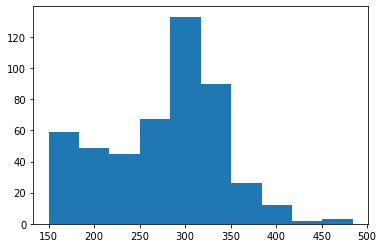

In [27]:
plt.hist(good_lmc_gaia_catalog_source_10deg_dec53_pm15['radial_velocity'][RV_cut1])
plt.show()

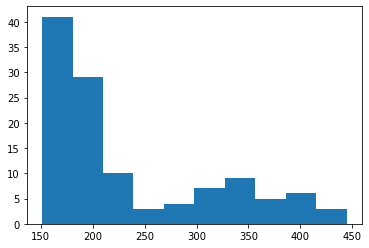

In [28]:
plt.hist(good_lmc_catalog['VHELIO'][RV_cut])
# plt.xlim(150,200)
plt.show()

# Code to Convert from (ra, dec) to (mlon,mlat) and (pmra,pmdec) to (pmml,pmmb)

In [46]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=good_lmc_catalog['RA'].data*u.deg, dec=good_lmc_catalog['DEC'].data*u.deg,
        pm_ra_cosdec=good_lmc_catalog['GAIAEDR3_PMRA'].data*u.mas/u.yr,
        pm_dec=good_lmc_catalog['GAIAEDR3_PMDEC'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
good_lmc_catalog['mlon'] = 0.0
good_lmc_catalog['mlat'] = 0.0
good_lmc_catalog['pmml'] = 0.0
good_lmc_catalog['pmmb'] = 0.0
good_lmc_catalog['mlon'] = mcoo.L
good_lmc_catalog['mlat'] = mcoo.B
good_lmc_catalog['pmml'] = mcoo.pm_L_cosB.value
good_lmc_catalog['pmmb'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

pmdist = np.sqrt((good_lmc_catalog['pmml']-1.70)**2 + (good_lmc_catalog['pmmb']-0.40)**2)
gdpm, = np.where((pmdist < 1.5))

In [47]:
good_lmc_catalog

ID,RA,DEC,M,T,D,VHEL,VERR,VHEL_MIKE,VGSR,DIST,L,B,GAIAEDR3_RA,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC,GAIAEDR3_DEC_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_GMAG,GAIAEDR3_GERR,GAIAEDR3_BPMAG,GAIAEDR3_BPERR,GAIAEDR3_RPMAG,GAIAEDR3_RPERR,GAIAEDR3_PML,GAIAEDR3_PMB,GAIAEDR3_PMML,GAIAEDR3_PMMB,VHELIO,LMCRAD,LMCPA,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,GAIAEDR3_Total_MAG_PM,GAIAEDR3_Total_PM,pmra_model,pmdec_model,mlon,mlat,pmml,pmmb,lmc_radius,pmra,pmdec,pm
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,,,mas / yr,mas / yr,deg,deg,,,,,,
int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64
1,105.12679291500001,-48.432281494,16.5329,15.0277,16.518,9999.9,9999.9,204.4,-9.092921,234.59,258.5664112343072,-18.529466742055202,105.1267525677789,0.024629863,-48.4322243022933,0.02877545,0.923296288674212,0.033957716,-0.315218639078465,0.036785074,0.0755301643488606,0.028460298,15.833436,0.00040028456586519486,16.437096,0.004289827728933562,15.082449,0.0025447046126595933,0.6159130768287333,0.7566304574879723,0.7457170864317325,-0.6290823222343533,204.4,24.171135,39.720993,0.5910812109647093,-1.4563538422118818,0.39941654671238064,-1.808269787224674,0.03936910007629734,-0.054541031128959465,0.15229556417603132,0.4064569761417518,0.1172970094840879,0.9930968792449656,1.1813776506744686,20.836427869100472,87.294243,0.9756221437662715,0.9756222768582385,1.4563538422118818,0.5910812109647093,15.70270230347623,21.221355080537737,0.7457173860008065,-0.6290821944056083,24.171135,0.923296288674212,-0.315218639078465,0.9756222768582385
2,105.681137085,-48.917621613,19.6126,18.387,19.5703,106.04,14.17,9999.9,-107.98845,234.42,259.18046050364035,-18.355619420554138,105.68110610733136,0.16334176,-48.91755275925184,0.17898266,0.7567200091018459,0.19598085,4.80280253793183,0.23308396,-0.0349947863758711,0.17819394,19.13581,0.0034218993856300157,19.692463,0.040909862122232306,18.494345,0.03058577207100339,-4.232884148710571,2.3921165592355464,2.4846740294763476,4.179225324207891,106.04,23.837791,40.970665,0.6276470365295748,-1.439709634590702,0.4284723250843425,-1.7931797256788025,0.04206385130496689,-0.05177868380184163,0.15711086014026518,0.40524877488994193,0.10516368853892688,0.994454925380174,1.1829729894502468,20.5949819644879,87.294243,4.862049963685496,4.862050739198382,1.439709634590702,0.6276470365295748,15.876462463835786,20.63551950935629,2.4846733826174447,4.17922667155682,23.837791,0.7567200091018459,4.80280253793183,4.862050739198382
3,105.76667785500001,-48.877811432,17.1322,15.8762,17.0406,94.83,3.8,9999.9,-119.26215,238.43,259.1619909389045,-18.288987564927666,105.76666449242522,0.035635326,-48.87777336380816,0.037874736,-0.4789935716991621,0.044019222,5.194062454278871,0.048492216,0.1903779067860237,0.038512304,16.581732,0.0005911569769307861,17.051605,0.009353064800417194,15.943343,0.003650808662217479,-5.0307594104191455,1.3781041204197209,1.4901586964555726,4.998713635018248,94.83,23.8945,41.067375,0.6285256849296834,-1.4374876007338655,0.42928373123399066,-1.7912980114989476,0.04201190613237348,-0.051556172950732726,0.15723004756331918,0.40536658371581497,0.10425112809200052,0.9945510053745584,1.1833892294412898,20.63792941320673,87.294243,5.216101150499155,5.216101956507232,1.4374876007338655,0.6285256849296834,15.94806411328988,20.651571031921733,1.490157629565283,4.998714820804136,23.8945,-0.4789935716991621,5.19

In [48]:
good_lmc_catalog.write('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3_extra.fits', overwrite = True)


In [49]:
lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3_extra.fits')

In [50]:
lmc_catalog

ID,RA,DEC,M,T,D,VHEL,VERR,VHEL_MIKE,VGSR,DIST,L,B,GAIAEDR3_RA,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC,GAIAEDR3_DEC_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_GMAG,GAIAEDR3_GERR,GAIAEDR3_BPMAG,GAIAEDR3_BPERR,GAIAEDR3_RPMAG,GAIAEDR3_RPERR,GAIAEDR3_PML,GAIAEDR3_PMB,GAIAEDR3_PMML,GAIAEDR3_PMMB,VHELIO,LMCRAD,LMCPA,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,GAIAEDR3_Total_MAG_PM,GAIAEDR3_Total_PM,pmra_model,pmdec_model,mlon,mlat,pmml,pmmb,lmc_radius,pmra,pmdec,pm
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,,,mas / yr,mas / yr,deg,deg,,,,,,
int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64
1,105.12679291500001,-48.432281494,16.5329,15.0277,16.518,9999.9,9999.9,204.4,-9.092921,234.59,258.5664112343072,-18.529466742055202,105.1267525677789,0.024629863,-48.4322243022933,0.02877545,0.923296288674212,0.033957716,-0.315218639078465,0.036785074,0.0755301643488606,0.028460298,15.833436,0.00040028456586519486,16.437096,0.004289827728933562,15.082449,0.0025447046126595933,0.6159130768287333,0.7566304574879723,0.7457170864317325,-0.6290823222343533,204.4,24.171135,39.720993,0.5910812109647093,-1.4563538422118818,0.39941654671238064,-1.808269787224674,0.03936910007629734,-0.054541031128959465,0.15229556417603132,0.4064569761417518,0.1172970094840879,0.9930968792449656,1.1813776506744686,20.836427869100472,87.294243,0.9756221437662715,0.9756222768582385,1.4563538422118818,0.5910812109647093,15.70270230347623,21.221355080537737,0.7457173860008065,-0.6290821944056083,24.171135,0.923296288674212,-0.315218639078465,0.9756222768582385
2,105.681137085,-48.917621613,19.6126,18.387,19.5703,106.04,14.17,9999.9,-107.98845,234.42,259.18046050364035,-18.355619420554138,105.68110610733136,0.16334176,-48.91755275925184,0.17898266,0.7567200091018459,0.19598085,4.80280253793183,0.23308396,-0.0349947863758711,0.17819394,19.13581,0.0034218993856300157,19.692463,0.040909862122232306,18.494345,0.03058577207100339,-4.232884148710571,2.3921165592355464,2.4846740294763476,4.179225324207891,106.04,23.837791,40.970665,0.6276470365295748,-1.439709634590702,0.4284723250843425,-1.7931797256788025,0.04206385130496689,-0.05177868380184163,0.15711086014026518,0.40524877488994193,0.10516368853892688,0.994454925380174,1.1829729894502468,20.5949819644879,87.294243,4.862049963685496,4.862050739198382,1.439709634590702,0.6276470365295748,15.876462463835786,20.63551950935629,2.4846733826174447,4.17922667155682,23.837791,0.7567200091018459,4.80280253793183,4.862050739198382
3,105.76667785500001,-48.877811432,17.1322,15.8762,17.0406,94.83,3.8,9999.9,-119.26215,238.43,259.1619909389045,-18.288987564927666,105.76666449242522,0.035635326,-48.87777336380816,0.037874736,-0.4789935716991621,0.044019222,5.194062454278871,0.048492216,0.1903779067860237,0.038512304,16.581732,0.0005911569769307861,17.051605,0.009353064800417194,15.943343,0.003650808662217479,-5.0307594104191455,1.3781041204197209,1.4901586964555726,4.998713635018248,94.83,23.8945,41.067375,0.6285256849296834,-1.4374876007338655,0.42928373123399066,-1.7912980114989476,0.04201190613237348,-0.051556172950732726,0.15723004756331918,0.40536658371581497,0.10425112809200052,0.9945510053745584,1.1833892294412898,20.63792941320673,87.294243,5.216101150499155,5.216101956507232,1.4374876007338655,0.6285256849296834,15.94806411328988,20.651571031921733,1.490157629565283,4.998714820804136,23.8945,-0.4789935716991621,5.19

# CMD cut of RC and RGB stars

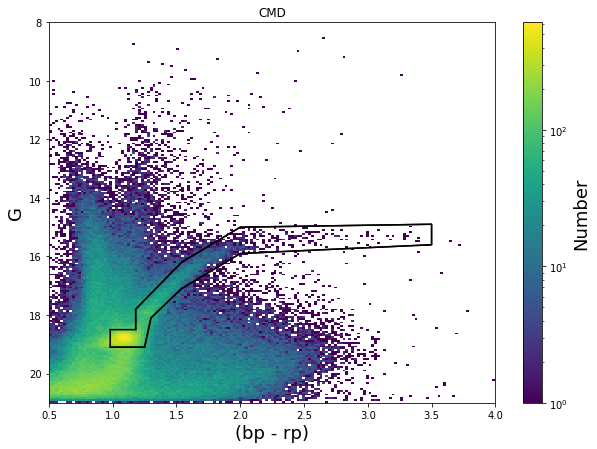

In [29]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_10deg_dec53_pm15['phot_bp_mean_mag'] - lmc_gaia_catalog_source_10deg_dec53_pm15['phot_rp_mean_mag'], 
          lmc_gaia_catalog_source_10deg_dec53_pm15['phot_g_mean_mag'], range=None, bins=220, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)

plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [30]:
xcut = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata = (lmc_gaia_catalog_source_10deg_dec53_pm15['phot_bp_mean_mag']
         - lmc_gaia_catalog_source_10deg_dec53_pm15['phot_rp_mean_mag'])
ydata = lmc_gaia_catalog_source_10deg_dec53_pm15['phot_g_mean_mag']
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

In [31]:
RGB_CMD_cut = lmc_gaia_catalog_source_10deg_dec53_pm15[cutind]
leftover = lmc_gaia_catalog_source_10deg_dec53_pm15[ind]
print(len(RGB_CMD_cut))
print(len(leftover))
print(len(cutind))
print(len(ind))

43342
209589
43342
209589


In [32]:
good_lmc_catalog['lmc_radius'] = lmc_catalog['LMCRAD']
good_lmc_catalog['pmra'] = lmc_catalog['GAIAEDR3_PMRA']
good_lmc_catalog['pmdec'] = lmc_catalog['GAIAEDR3_PMDEC']
good_lmc_catalog['pmml'] = lmc_catalog['GAIAEDR3_PMML']
good_lmc_catalog['pmmb'] = lmc_catalog['GAIAEDR3_PMMB']
good_lmc_catalog['pm'] = lmc_catalog['GAIAEDR3_Total_PM']

In [29]:
# good_lmc_catalog = lmc_catalog[np.where((pmdist < 0.7) &
#                                np.isfinite(lmc_catalog['M']) & 
#                               np.isfinite(lmc_catalog['T']) & 
#                               np.isfinite(lmc_catalog['D']) &
#                               np.isfinite(lmc_catalog['VHEL']) &
#                               np.isfinite(lmc_catalog['LMCRAD']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PMRA']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PMDEC']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_BPMAG']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_RPMAG']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_GMAG']) & 
# #                               np.isfinite(lmc_catalog['VHELIO']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PML']))]

In [31]:
# good_lmc_catalog = lmc_catalog[np.where((pmdist < 0.7))]

# Compare HydraMikeData and Gaia Query RGB/RC stars

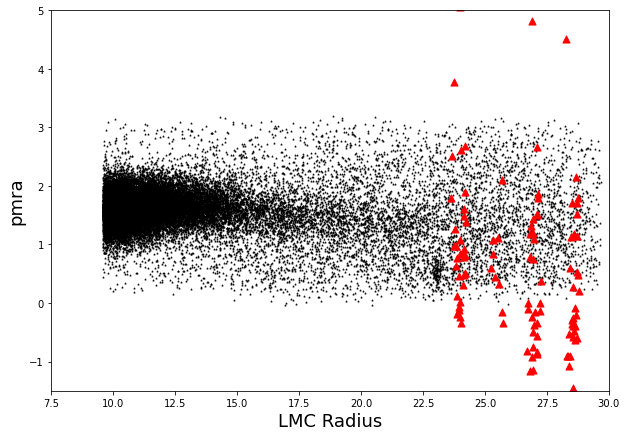

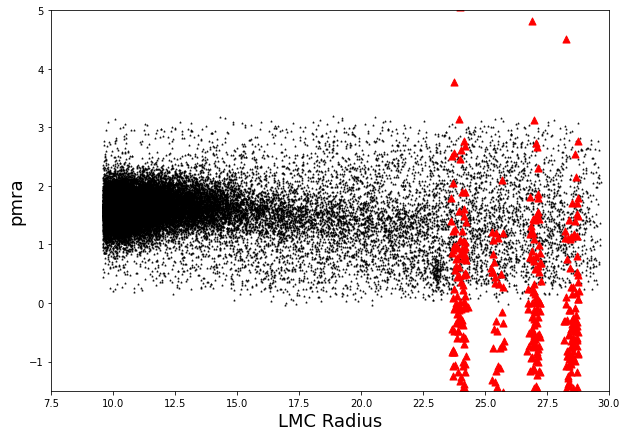

In [52]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pmra'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['pmra'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pmra', fontsize=18)
plt.ylim(-1.5,5)
plt.xlim(7.5,30)
plt.show()


plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pmra'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['lmc_radius'], lmc_catalog['pmra'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pmra', fontsize=18)
plt.ylim(-1.5,5)
plt.xlim(7.5,30)
plt.show()


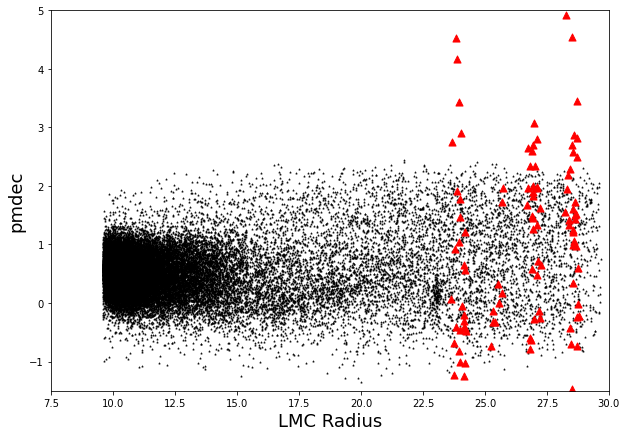

In [53]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pmdec'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['pmdec'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel( 'pmdec', fontsize=18)
plt.ylim(-1.5,5)
plt.xlim(7.5,30)
plt.show()

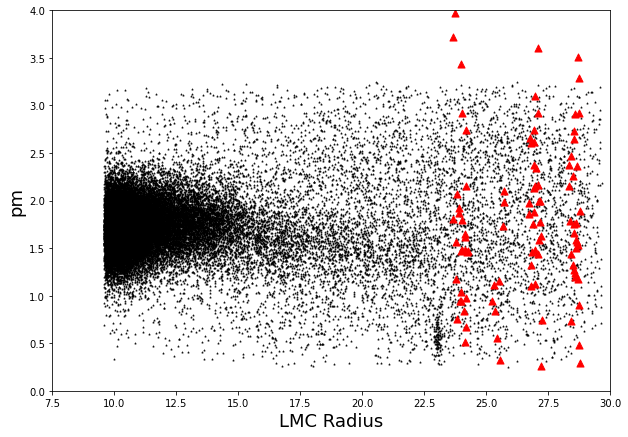

In [54]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pm'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['pm'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pm', fontsize=18)
plt.ylim(0,4)
plt.xlim(7.5,30)
plt.show()

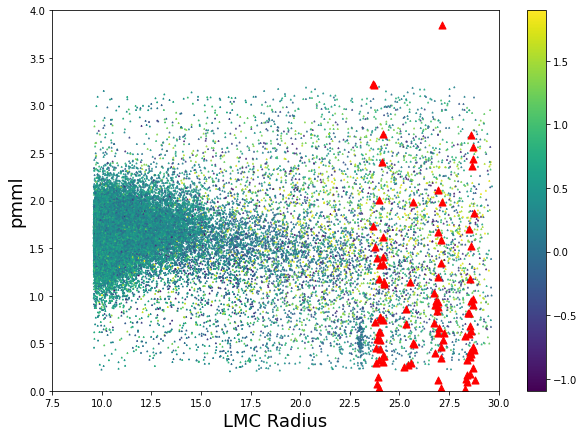

In [60]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pmml'],  marker='^', s=1, c=RGB_CMD_cut['pmmb'], linestyle='None', alpha=1)

plt.colorbar()


plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['pmml'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.ylim(0,4)
plt.xlim(7.5,30)
plt.show()



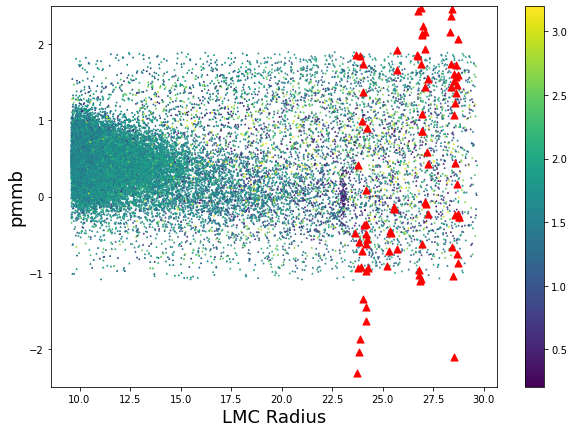

In [61]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['pmmb'], marker='^', s=1, c=RGB_CMD_cut['pmml'], linestyle='None', alpha=1)
plt.colorbar()

plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['pmmb'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylim(-2.5,2.5)
plt.ylabel( 'pmmb', fontsize=18)
plt.show()

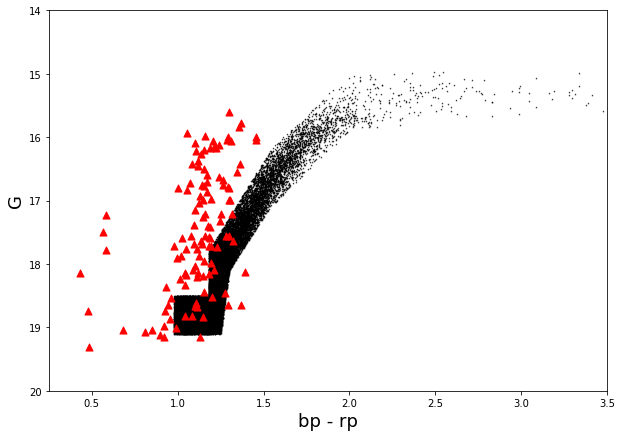

In [43]:

plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['phot_bp_mean_mag'] - RGB_CMD_cut['phot_rp_mean_mag'], RGB_CMD_cut['phot_g_mean_mag'], marker='^', s=0.5, color='black', linestyle='None', alpha=0.7)
plt.scatter(good_lmc_catalog['GAIAEDR3_BPMAG'][RV_cut] - good_lmc_catalog['GAIAEDR3_RPMAG'][RV_cut], good_lmc_catalog['GAIAEDR3_GMAG'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('bp - rp', fontsize=18)
plt.ylabel( 'G', fontsize=18)
plt.xlim(0.25,3.5)
plt.ylim(14,20)
plt.gca().invert_yaxis()
plt.show()

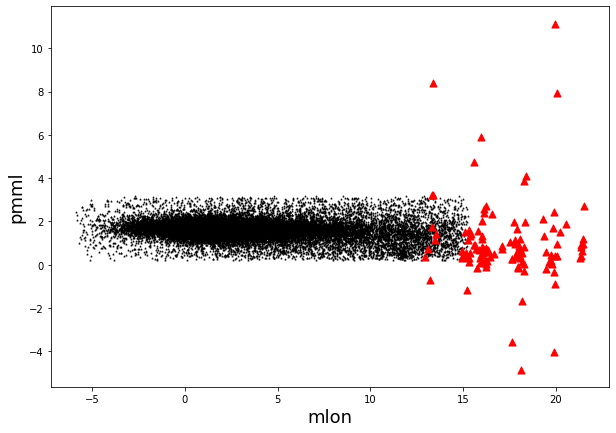

In [62]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['mlon'][RV_cut], lmc_catalog['pmml'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel( 'pmml', fontsize=18)
plt.show()


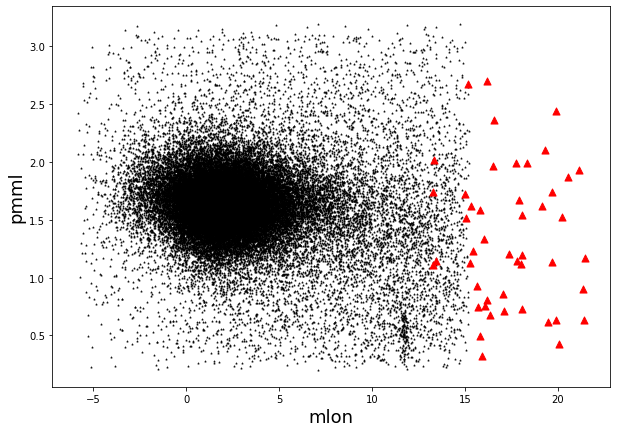

In [63]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['mlon'][gdpm], lmc_catalog['pmml'][gdpm], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.show()

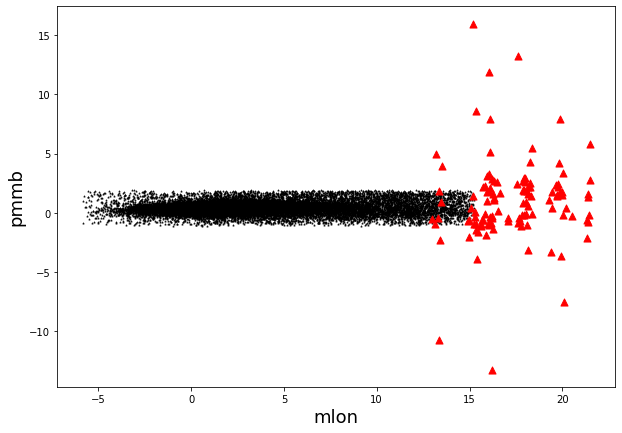

In [64]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['mlon'][RV_cut], lmc_catalog['pmmb'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

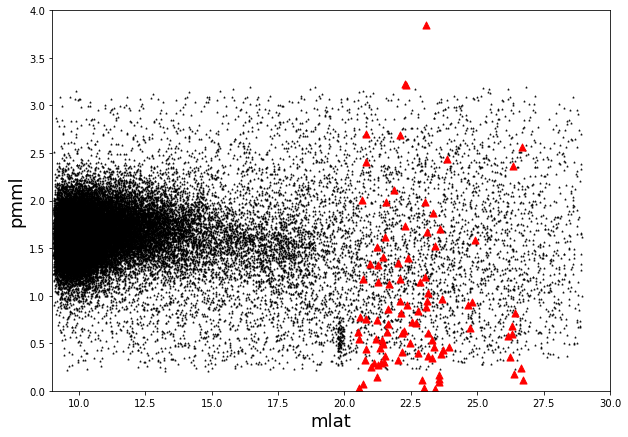

In [67]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['mlat'][RV_cut], lmc_catalog['pmml'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.xlim(9,30)
plt.ylim(0,4)
plt.show()

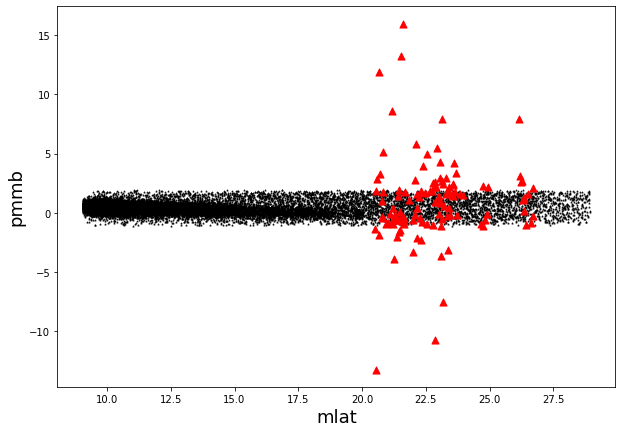

In [68]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['mlat'][RV_cut], lmc_catalog['pmmb'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

# RV vs LMC radius (comparing apogee data and Hydra Mike data)

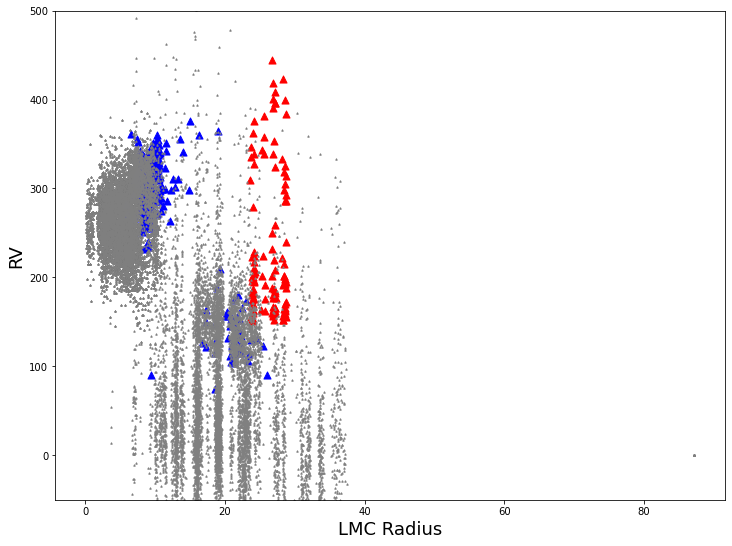

In [70]:
plt.figure(figsize=(12,9))

plt.scatter(good_lmc_apogee_catalog['LMCRAD'], good_lmc_apogee_catalog['VHELIO_AVG'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(lmc_catalog['lmc_radius'][RV_cut], lmc_catalog['VHELIO'][RV_cut], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.scatter(lmc_sdssv_catalog['lmc_radius'], lmc_sdssv_catalog['xcsao_rv'], marker='^', s=50, color='blue', linestyle='None', alpha=1 )
plt.scatter(lmc_maps_catalog['LMCRAD'], lmc_maps_catalog['VHELIO'], marker='^', s=2, color='gray', linestyle='None', alpha=1 )

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.show()

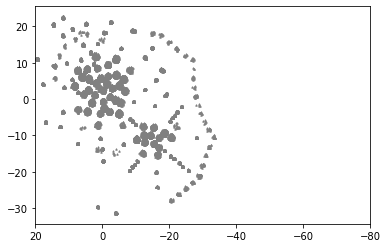

In [95]:
plt.scatter(lmc_maps_catalog['MLON'], lmc_maps_catalog['MLAT'], marker='^', s=2, color='gray', linestyle='None', alpha=1)
plt.xlim(20,-80)
plt.show()


# Spatial Cut on lmc_maps_catalog to only include LMC stars  

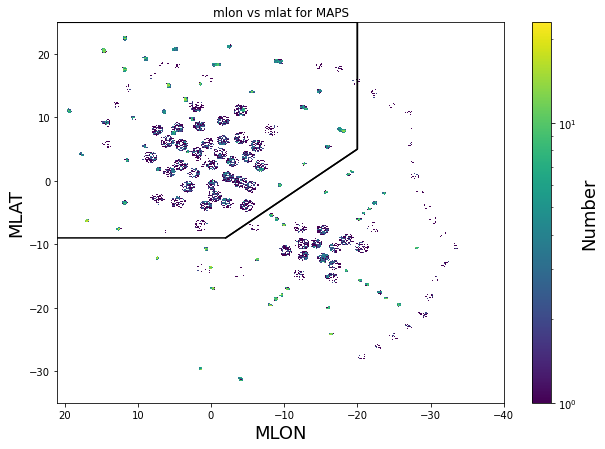

In [86]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_maps_catalog['MLON'],lmc_maps_catalog['MLAT'],
           range=None, bins=600, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(21,-40)
plt.ylim(25,-35)

plt.gca().invert_yaxis()

x_vals = ([22, -2], [-2,-20], [-20,-20], [-20,22], [22,22])

y_vals = ([-9, -9], [-9,5], [5,25], [25,25], [25,-9])

plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for MAPS")
cbar.set_label('Number', fontsize=18)
plt.show()

In [88]:
from dlnpyutils import utils as dln
xcut = [22, -2], [-2,-20], [-20,-20], [-20,22], [22,22]
ycut = [-9, -9], [-9,5], [5,25], [25,25], [25,-9]
xdata = lmc_maps_catalog['MLON']
ydata = lmc_maps_catalog['MLAT']
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (5, 2, 2).

In [ ]:
maps_catalog_spatialcut = lmc_maps_catalog[cutind]
leftover_SMC = lmc_maps_catalog[ind]
print(len(maps_catalog_spatialcut))
print(len(leftover_SMC))
print(len(cutind))
print(len(ind))

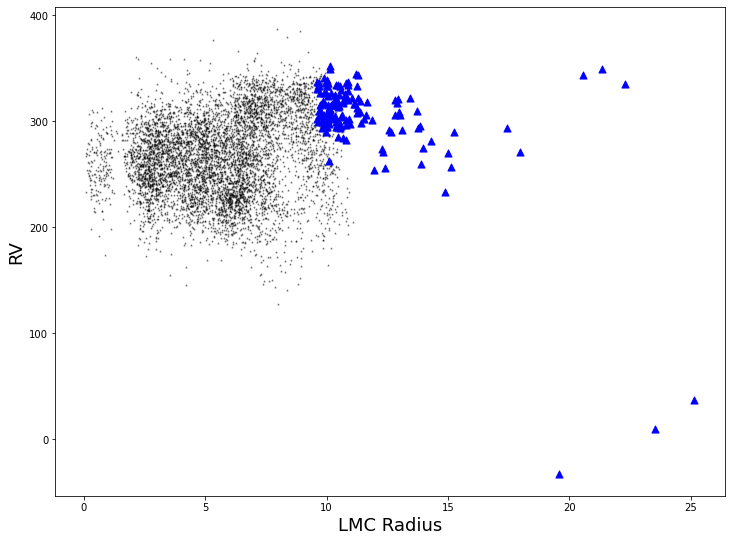

In [80]:
plt.figure(figsize=(12,9))

plt.scatter(good_lmc_apogee_catalog['LMCRAD'], good_lmc_apogee_catalog['VHELIO_AVG'],  marker='^', s=1, color='black', linestyle='None', alpha=0.5)
plt.scatter(RGB_CMD_cut['lmc_radius'], RGB_CMD_cut['radial_velocity'], marker='^', s=50, color='blue', linestyle='None', alpha=1.0)
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.show()

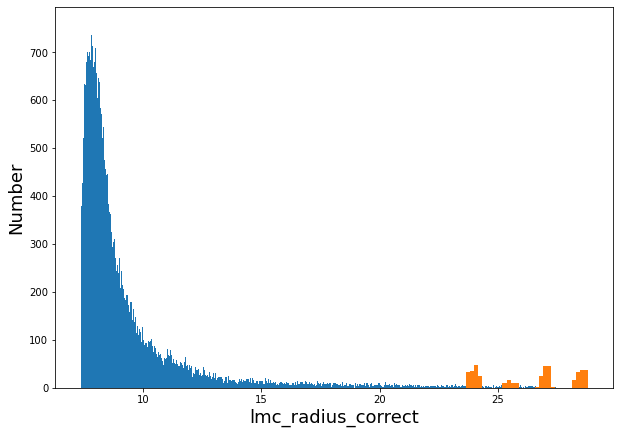

In [21]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['lmc_radius_correct'], bins=600)
plt.hist(good_lmc_catalog['lmc_radius_correct'], bins=30)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

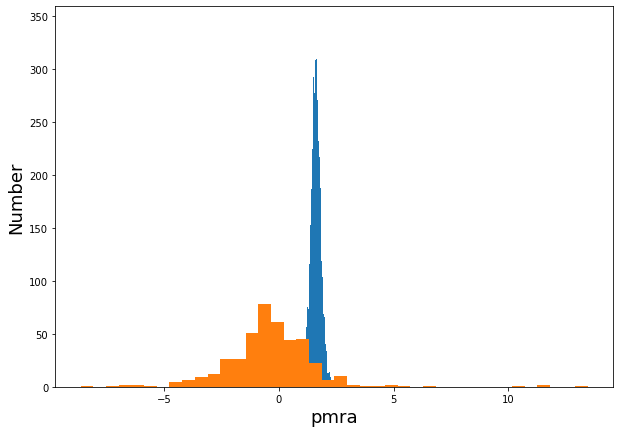

In [24]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmra'], bins=400)
plt.hist(good_lmc_catalog['pmra'], bins=40)
plt.xlabel('pmra', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

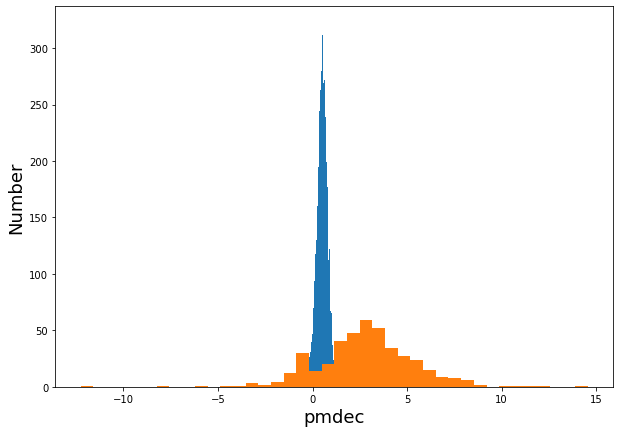

In [25]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmdec'], bins=400)
plt.hist(good_lmc_catalog['pmdec'], bins=40)
plt.xlabel('pmdec', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

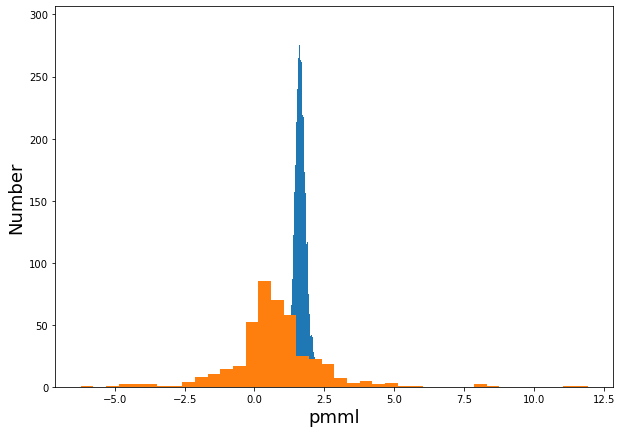

In [26]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmml'], bins=400)
plt.hist(good_lmc_catalog['pmml'], bins=40)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

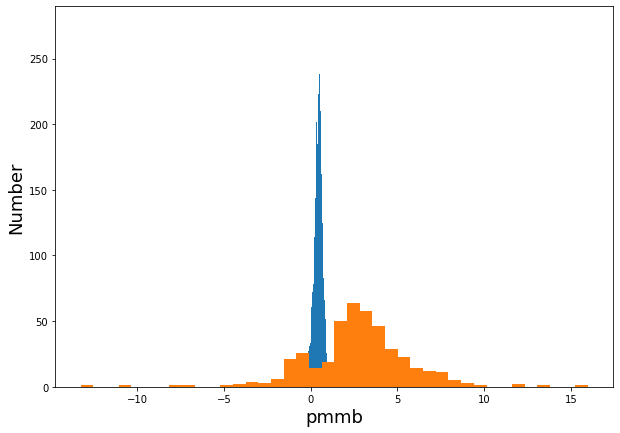

In [27]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmmb'], bins=400)
plt.hist(good_lmc_catalog['pmmb'], bins=40)
plt.xlabel('pmmb', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()